Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
from smokedetectoroptimization.optimizer import (optimize, evaluate_optimization,
                                                 optimization_logger, evaluate_locations)
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS, SINGLE_OBJECTIVE_FUNCTIONS_TTA,
                                                 SINGLE_OBJECTIVE_FUNCTIONS_MC)

In [2]:
import sys
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import SMOKE_FOLDERS, FALSE_ALARM_FOLDERS, NASA_DETECTORS

The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

This is simply a visualization style thing. It controls whether plots are interpolated, which is prettier, or whether they are dots, which is arguably more informative. Note, for this to have any effect, SMOOTH_PLOTS must be already imported

In [4]:
SMOOTH_PLOTS = True

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\first_computer_full3D


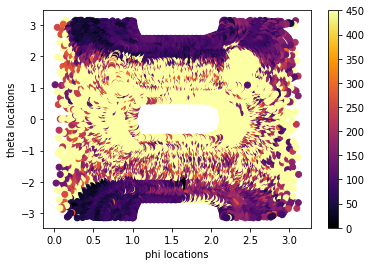

In [5]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in SMOKE_FOLDERS[:1]:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
    

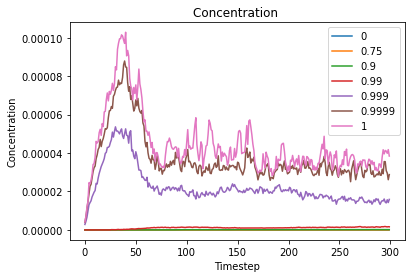

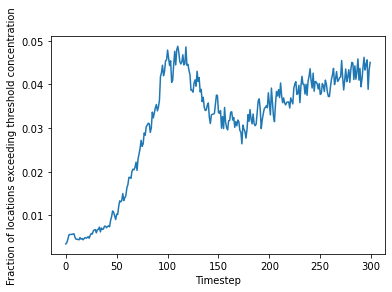

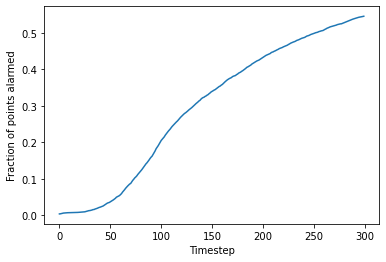

In [6]:
source = sources[0]
source.visualize_summary_statistics(quantiles=(0, 0.75, 0.9, 0.99, 0.999, 0.9999, 1))

Showing a 3D plot of time to alarm with final locations in green


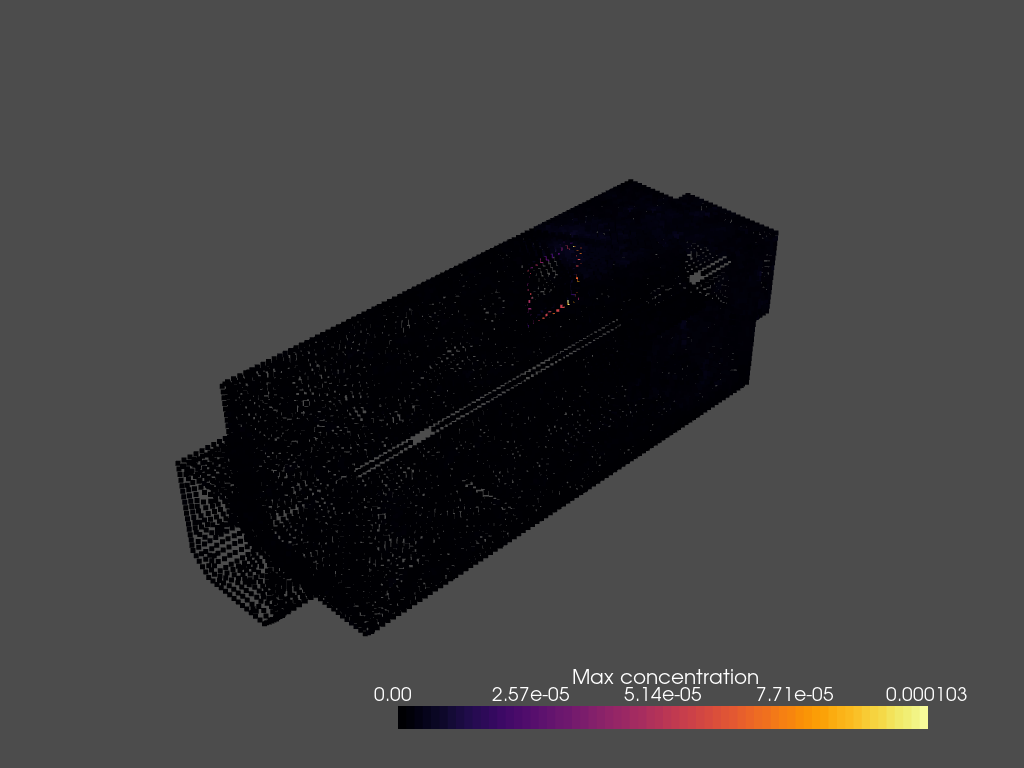

In [7]:
source.visualize_3D(which_metric="max_concentration")

divide by zero encountered in log10
Showing a 3D plot of time to alarm with final locations in green


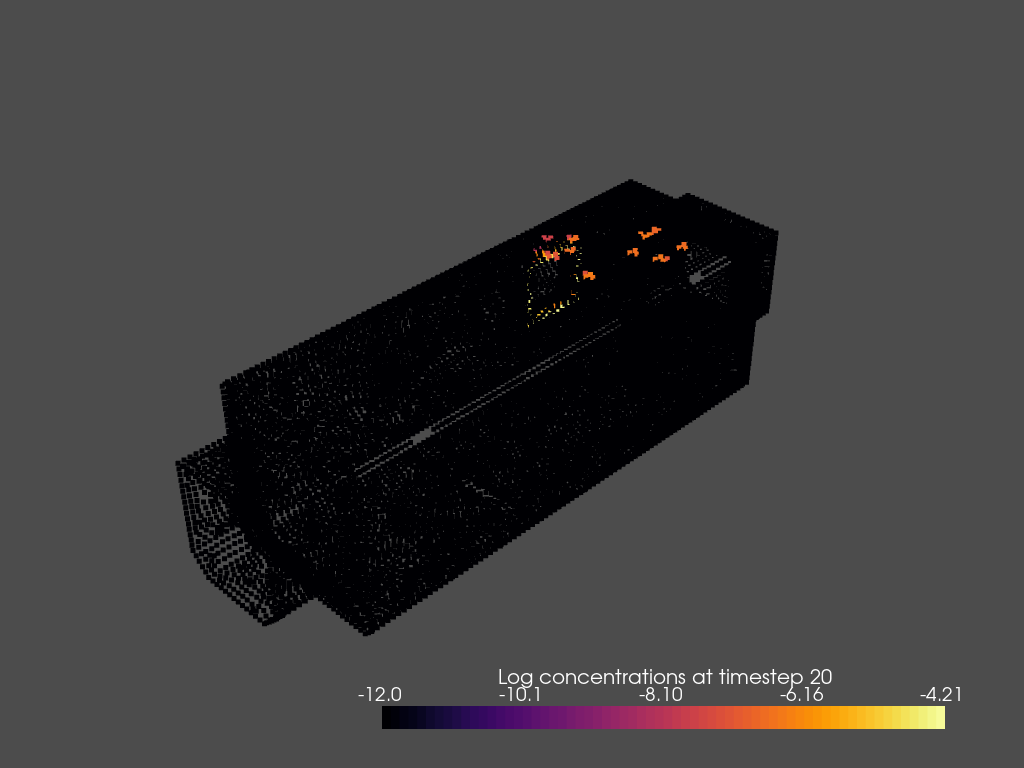

In [8]:
source.visualize_3D(concentation_timestep=20, log_concentrations=True)

Showing a 3D plot of time to alarm with final locations in green


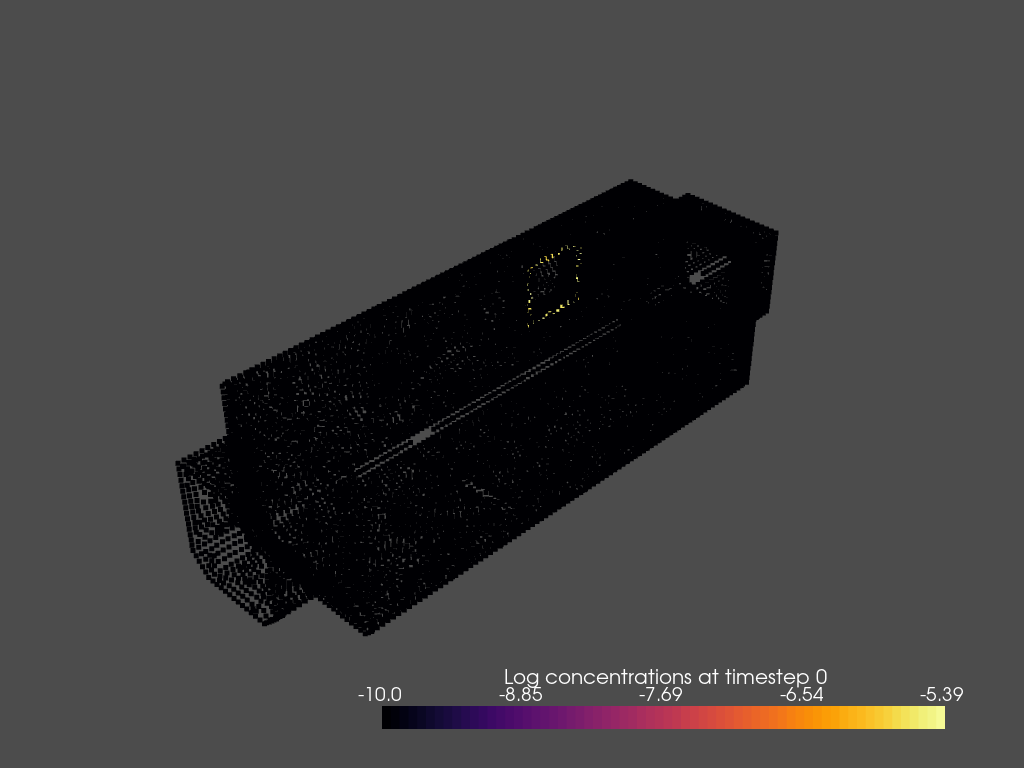

Showing a 3D plot of time to alarm with final locations in green


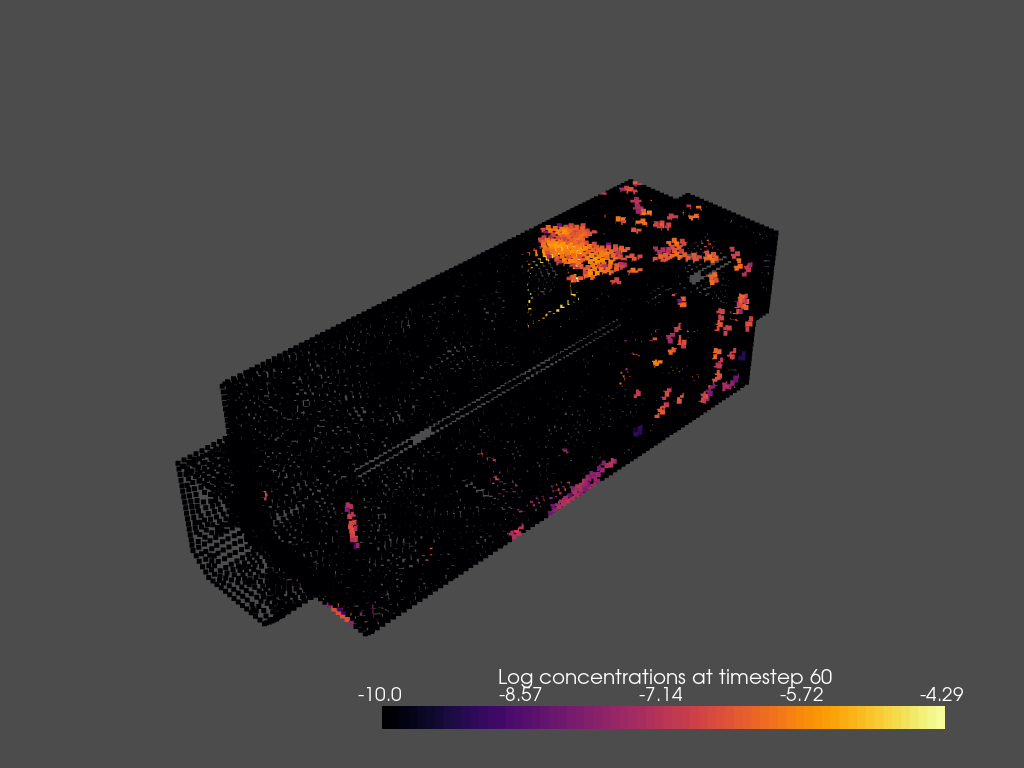

Showing a 3D plot of time to alarm with final locations in green


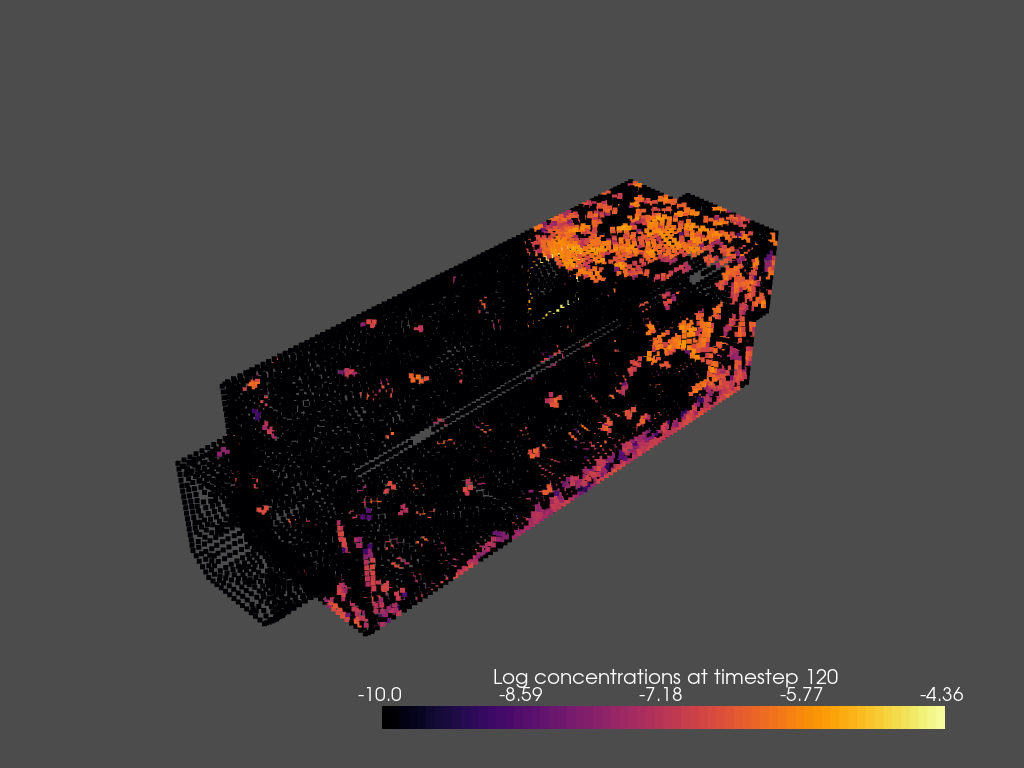

Showing a 3D plot of time to alarm with final locations in green


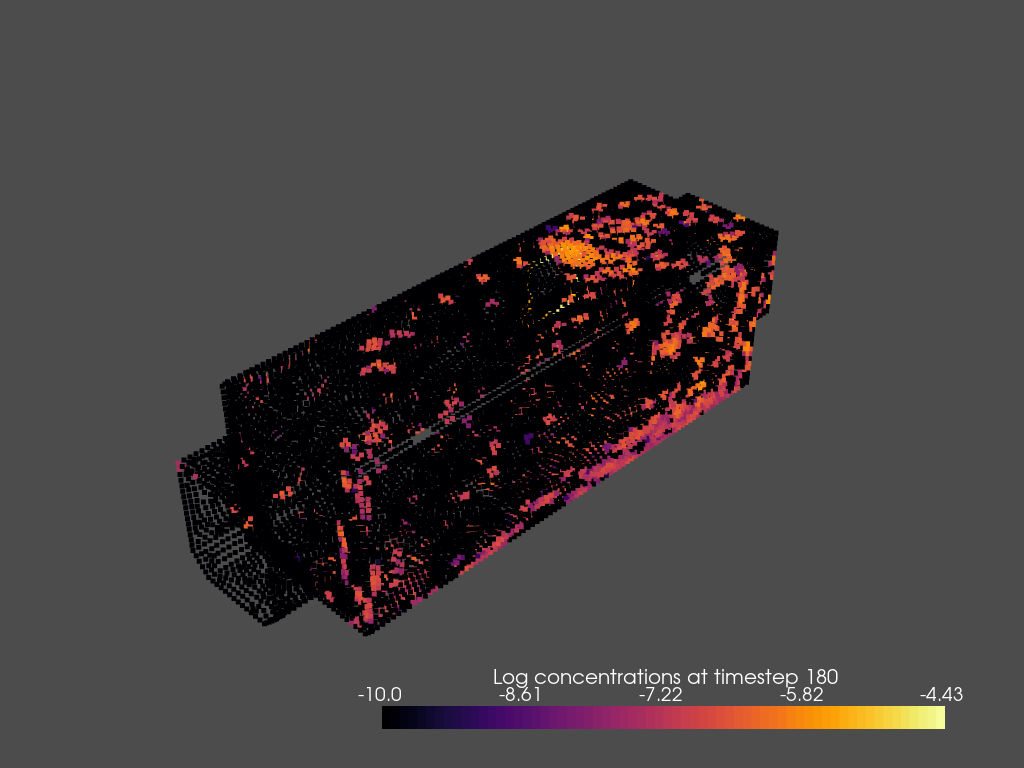

Showing a 3D plot of time to alarm with final locations in green


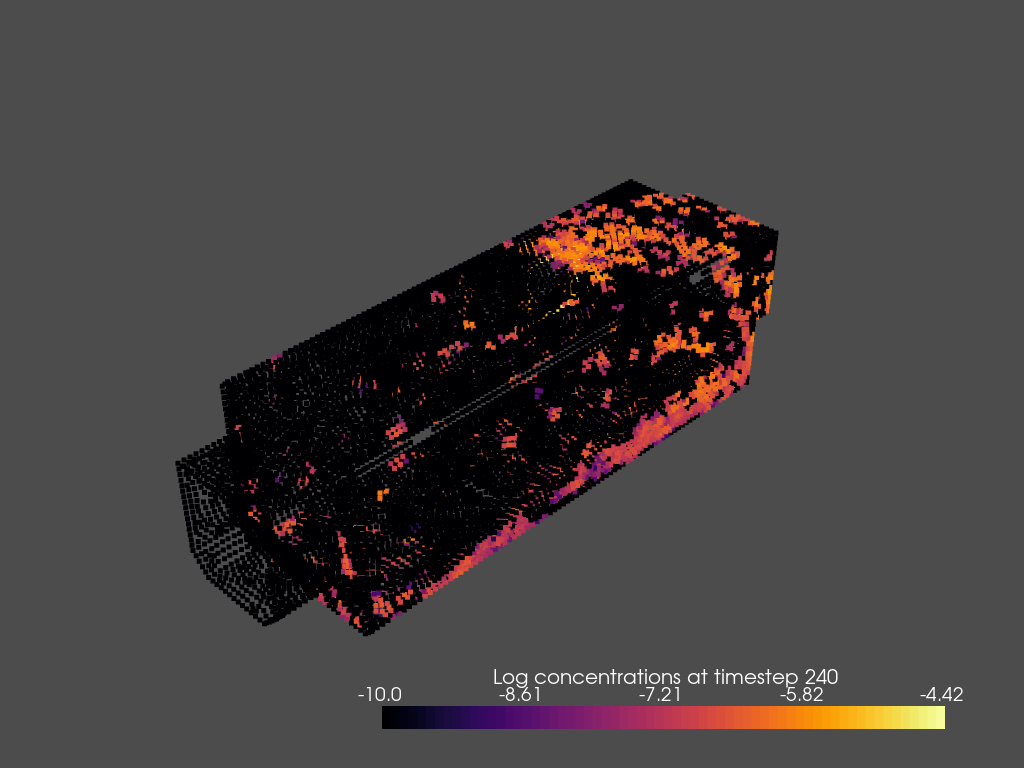

Showing a 3D plot of time to alarm with final locations in green


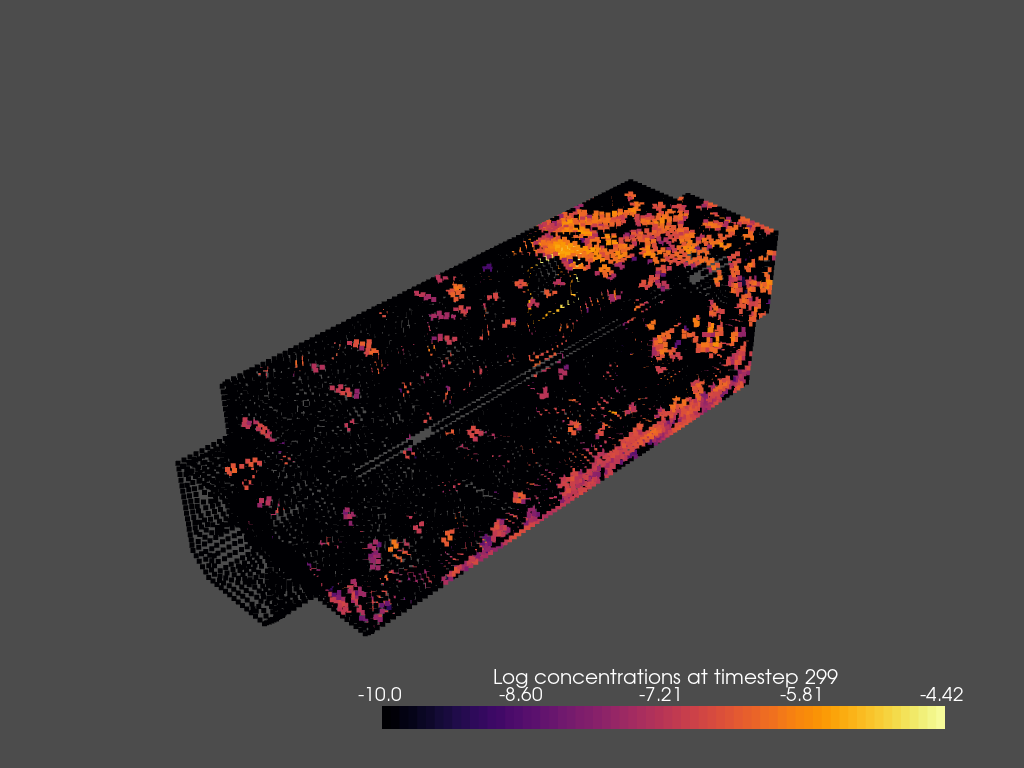

In [9]:
TIMESTEPS = [0, 60, 120, 180, 240, 299]
for timestep in TIMESTEPS:
    source.visualize_3D(concentation_timestep=timestep, log_concentrations=True, log_lower_bound=-10)

Here we explore the impact of different interpolation strategies.

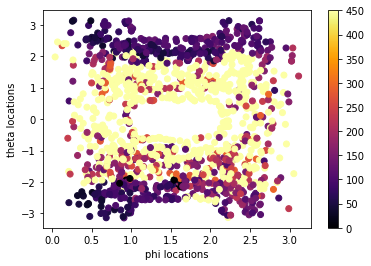

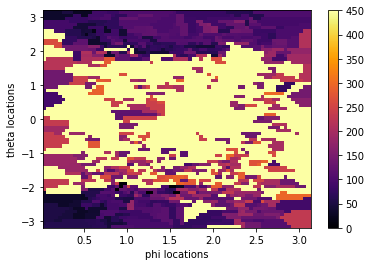

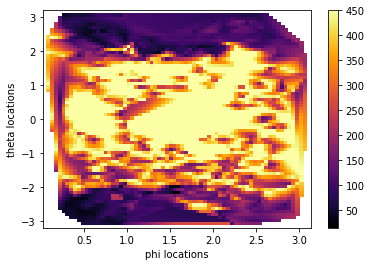

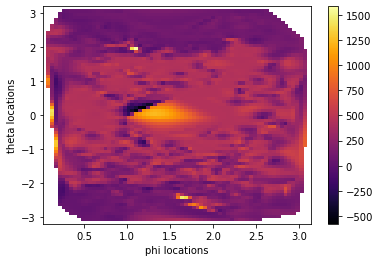

In [10]:
# Visualize the first source with differnt types of interpolation
POINTS_FRACTION = 0.1
source = sources[0]
interpolation_methods = [None, "nearest", "linear", "cubic"]
for interpolation_method in interpolation_methods:
    source.visualize_metric(points_fraction=POINTS_FRACTION, interpolation=interpolation_method)

In [11]:
import pyvista as pv

PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
# This should be approximately the location of the sources
VIS = True

sources[0].visualize_3D(highlight_locations=NASA_DETECTORS, plotter=pv.PlotterITK)

Showing a 3D plot of time to alarm with final locations in green


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [12]:
# check how good the NASA locations are
res = evaluate_locations(NASA_DETECTORS, sources,
                        function_type=FUNCTION_TYPE,
                        interpolation_method=INTERPOLATION_METHOD,
                        vis=VIS)
print(f"The value of location {NASA_DETECTORS} is {res}")

The value of location (2.11500001, -3.0, -2.84649992, 6.42500019, 0.0, -2.84649992) is 450.0
